
#### Kate Cough
#### Project One: Titanic
#### July 2017

## Summary

I have a dataset with information about passengers on the Titanic that includes the fare they paid and whether they survived the sinking; I would like to calculate the relationship between ticket price and the likelihood that one survived. 

I'm imagining the final product to look like this:

## Details

Possible headline(s): 
Passengers who paid higher fares more likely to survive sinking of Titanic

Paying for to survive: passengers who paid higher fare more likely to survive Titanic sinking

Data set(s): From the department of Biostats at Vanderbilt (http://biostat.mc.vanderbilt.edu/wiki/Main/DataSets), using information from Encyclopedia Titanica (https://www.encyclopedia-titanica.org/)

Code repository: https://github.com/jsoma/sample-pages/tree/master/code/a-very-cool-project

Possible problems/fears/questions: Calculating probabilities 


**Data Dictionary**

    survival: Survival	0 = No, 1 = Yes
    pclass: Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
    sex: Sex (male/female)	
    Age: Age in years	
    sibsp: # of siblings / spouses aboard the Titanic	
    parch: # of parents / children aboard the Titanic	
    ticket: Ticket number	
    fare: Passenger fare	
    cabin: Cabin number	
    embarked: Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

**Variable Notes**

    pclass: A proxy for socio-economic status (SES)
    1st = Upper
    2nd = Middle
    3rd = Lower

    age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

    sibsp: The dataset defines family relations in this way...
    Sibling = brother, sister, stepbrother, stepsister
    Spouse = husband, wife (mistresses and fiancés were ignored)

    parch: The dataset defines family relations in this way...
    Parent = mother, father
    Child = daughter, son, stepdaughter, stepson
    Some children travelled only with a nanny, therefore parch=0 for them.

    source: https://www.kaggle.com/c/titanic/data

    the data came from here: https://www.encyclopedia-titanica.org/

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42

import numpy as np
plt.style.use('ggplot')
%matplotlib inline
df = pd.read_csv('/Users/kaitlincough/Documents/data_studio/data_studio_projects/code/titanic_project_1/titanic3.csv')

In [2]:
df.head(200)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.00,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.00,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [3]:
#could we create a dataframe with the value counts of
#the fare and merge that with the survivors?
# df['fare'].value_counts()

In [4]:
df.shape


(1309, 14)

### An important note: there are 1308 passengers in this dataset. Numbers vary as to how many passengers were aboard, but it was somewhere in the area of 2,220 or so, with 702 survivors. That's over 1,500 people who perished. So the data is incomplete and should be regarded as such. 
(This didn't actually occur to me until I was pretty deep into working with the dataset--but it's a good lesson to take into account the data's limitations before diving in.)

We can start with some preliminary analysis, just to get an idea of what we're working with. 

### How many men were there on board? Women?

In [5]:
#how many men? women?
df['sex'].value_counts()

male      843
female    466
Name: sex, dtype: int64

### What was the average age of passengers? The oldest? The youngest?

In [6]:
#what was the average age of passengers?
df['age'].describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64

### The average fare? The most expensive? 

In [7]:
#average fare price? max?
df['fare'].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64

### How many passengers were traveling in 3rd class? 1st class?

In [8]:
df['pclass'].value_counts()

3    709
1    323
2    277
Name: pclass, dtype: int64

### The cheapest is 0 because there were crew members who did not pay for passage.

### What percentage of passengers survived?

In [9]:
#so divide the number of surviving passengers (sum of survived) by 
#the total number of passengers and subtract that number
#from 100

df['survived'].sum() / 1309 * 100

38.19709702062643

### How many children were traveling without a parent?

In [10]:
#new dataset with just children (under 18)
kids = df[df['age'] < 18]
kids.head()



,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.55,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
53,1,0,"Carrau, Mr. Jose Pedro",male,17.00,0,0,113059,47.10,NaN,S,NaN,NaN,"Montevideo, Uruguay"
54,1,1,"Carter, Master. William Thornton II",male,11.00,1,2,113760,120.00,B96 B98,S,4,NaN,"Bryn Mawr, PA"
55,1,1,"Carter, Miss. Lucile Polk",female,14.00,1,2,113760,120.00,B96 B98,S,4,NaN,"Bryn Mawr, PA"


In [11]:
kids.shape

(154, 14)

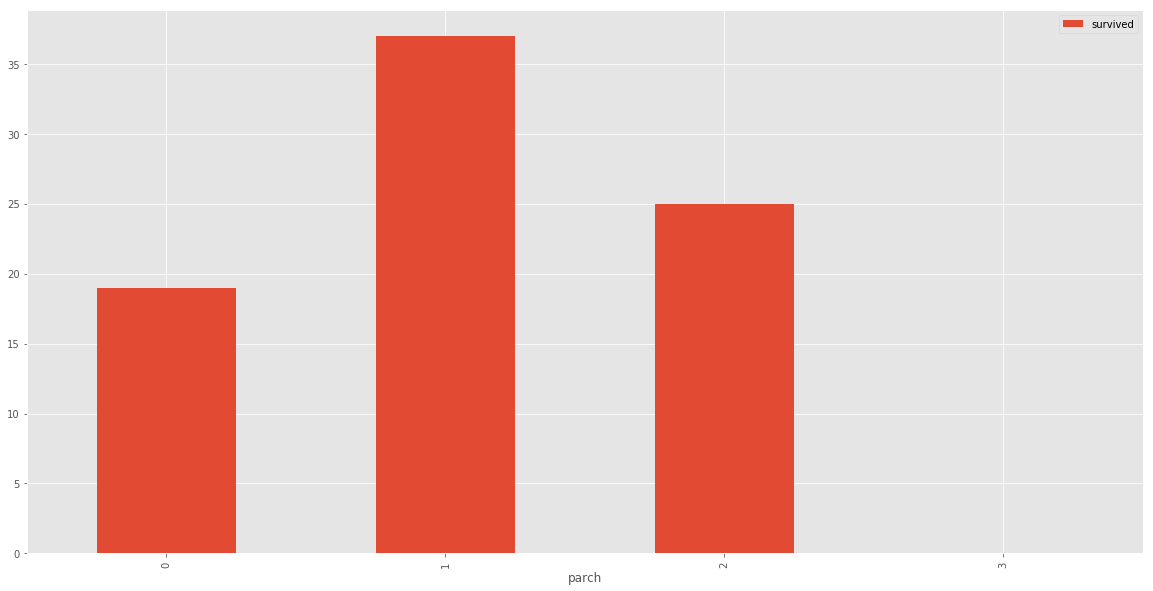

In [12]:
#the number of children who survived based on how many 
#people they were traveling with
kids.groupby(['parch']).sum().plot(kind='bar', y='survived', figsize=(20,10))

In [13]:
#all the children traveling without a parent
kids[kids['parch'] == 0]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
53,1,0,"Carrau, Mr. Jose Pedro",male,17.0,0,0,113059,47.1000,NaN,S,NaN,NaN,"Montevideo, Uruguay"
92,1,1,"Dick, Mrs. Albert Adrian (Vera Gillespie)",female,17.0,1,0,17474,57.0000,B20,S,3,NaN,"Calgary, AB"
195,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5000,B79,S,8,NaN,NaN
229,1,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.0,1,0,PC 17758,108.9000,C65,C,8,NaN,"Madrid, Spain"
390,2,0,"Deacon, Mr. Percy William",male,17.0,0,0,S.O.C. 14879,73.5000,NaN,S,NaN,NaN,NaN
416,2,0,"Gaskell, Mr. Alfred",male,16.0,0,0,239865,26.0000,NaN,S,NaN,NaN,"Liverpool / Montreal, PQ"
458,2,1,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,NaN,S,NaN,NaN,Guernsey
482,2,1,"Lehmann, Miss. Bertha",female,17.0,0,0,SC 1748,12.0000,NaN,C,12,NaN,"Berne, Switzerland / Central City, IA"
510,2,0,"Mudd, Mr. Thomas Charles",male,16.0,0,0,S.O./P.P. 3,10.5000,NaN,S,NaN,NaN,"Halesworth, England"
513,2,1,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,NaN,NaN,"New York, NY"


### So there are 42 children in this dataset traveling without a parent (likely with a nanny). How many of them survived?

In [14]:
kids[(kids['parch'] == 0) & (kids['survived'] == 1)].shape

(19, 14)

### Were you more likely to survive if you were a man or a woman?

In [15]:
#what percentage of female passenger perished? of male passengers?
df[(df['sex'] == 'female') & (df['survived'] == 1)].sum()

pclass                                                    645
survived                                                  339
name        Allen, Miss. Elisabeth WaltonAndrews, Miss. Ko...
sex         femalefemalefemalefemalefemalefemalefemalefema...
age                                                   8706.09
sibsp                                                     173
parch                                                     182
ticket      241601350211769PC 17757PC 1747719877PC 1755811...
fare                                                  18693.2
body                                                      NaN
dtype: object

In [16]:
339 / 1309 * 100

25.89763177998472

In [17]:
#what percentage of female passenger perished? of male passengers?
df[(df['sex'] == 'male') & (df['survived'] == 1)].sum()

pclass                                                    336
survived                                                  161
name        Allison, Master. Hudson TrevorAnderson, Mr. Ha...
sex         malemalemalemalemalemalemalemalemalemalemalema...
age                                                      3642
sibsp                                                      58
parch                                                      56
ticket      1137811995227042117511113691196711056411227711...
fare                                                  5987.44
embarked    SSSSCCSCSSCSSSCSSSSSCSSCCCCCCCCSCSSSCCSCCSSSCS...
body                                                      NaN
dtype: object

In [18]:
161 / 1309 * 100

12.299465240641712

## So you were more than twice as likely to survive the sinking if you were a female.

In [19]:
100 - (1500/2220 * 100)

32.432432432432435

In [20]:
#let's look at all of the different fares and how many people paid 
#each fare value. there are lots of random ones.
df['fare'].value_counts().sort_values(ascending=True)

34.6542     1
14.0000     1
25.7417     1
28.5375     1
8.1375      1
7.3125      1
26.3875     1
7.7792      1
7.2833      1
6.2375      1
12.5250     1
8.3000      1
8.3625      1
7.7875      1
8.1583      1
6.8583      1
12.0000     1
15.0000     1
25.5875     1
8.0292      1
28.7125     1
7.7292      1
7.5208      1
12.2750     1
7.8750      1
9.4833      1
8.4583      1
9.3250      1
27.4458     1
3.1708      1
           ..
56.4958     8
46.9000     8
7.0500      9
15.2458     9
24.1500     9
7.7958     10
7.8792     10
14.4542    10
15.5000    10
27.7208    11
14.5000    11
69.5500    11
16.1000    12
9.5000     12
21.0000    14
0.0000     17
7.2500     18
8.6625     21
7.8542     21
7.2250     21
26.5500    22
7.9250     23
7.2292     24
7.7750     26
10.5000    35
7.8958     49
26.0000    50
7.7500     55
13.0000    59
8.0500     60
Name: fare, Length: 281, dtype: int64

### Let's group by the fare price. Were you more likely to survive if you paid more for a ticket?

In [21]:
#what (column to group by), [what column you want info about], .what kind of info you want()
# df.groupby("Continent")["GDP_per_capita"].describe()
#let's look at this. groupby fare and get information on the survived column
# data[data['Type'].str.contains('Fruit')]

#let's groupby the fare and see the number of 
#people who survived for each fare (we can sum because the
#values are 0 and 1 so sum will give us the number
#of survivors)
fare_grouped = df.groupby('fare')['survived'].sum()
fare_grouped.head()

fare
0.0000    2
3.1708    1
4.0125    0
5.0000    0
6.2375    0
Name: survived, dtype: int64

In [22]:
#turn this series into a dataframe 

fare_grouped = fare_grouped.to_frame('fare_grouped')
fare_grouped.reset_index(inplace=True)

In [23]:
fare_grouped.head()

,fare,fare_grouped
0,0.0000,2
1,3.1708,1
2,4.0125,0
3,5.0000,0
4,6.2375,0


In [24]:
#let's round the fares so they make a cleaner graph
fare_grouped['rounded_fare'] = fare_grouped['fare'].round() 
fare_grouped.head()

,fare,fare_grouped,rounded_fare
0,0.0000,2,0.0
1,3.1708,1,3.0
2,4.0125,0,4.0
3,5.0000,0,5.0
4,6.2375,0,6.0


In [25]:
#PLOT NUMBER OF PEOPLE WHO DIED BASED ON THE TICKET PRICE

#ticket price on y axis
# x axis is number of people who died
#maybe plot as a line graph

In [26]:
fare_grouped.plot(kind='bar',
                  x='rounded_fare', 
                  y='number_survivors', 
                  figsize=(20,10)
                  )

KeyError: 'number_survivors'

In [ ]:
#check to see if it worked
fare_grouped.head()

In [ ]:
#create a new column with the number of tickets purchased
#based on the value counts for the fare column in the OG df

fare_grouped['number_tickets_purchased'] = df['fare'].value_counts()
fare_grouped

In [ ]:
fare_grouped=fare_grouped.reset_index()

In [ ]:
fare_grouped

In [ ]:
#rename the columns immediately because otherwise
#it's confusing

fare_grouped.rename(columns={'fare_grouped':'number_survivors'}, inplace=True)
fare_grouped.head()

In [ ]:
fare_grouped.columns

In [ ]:
#create a new column with the survival rate
#by dividing the # of survivors
#by the # of people who purchased a ticket at 
#that fare survivors / number_tickets_purchased

fare_grouped['survival_%_rate'] = (fare_grouped['number_survivors']/fare_grouped['number_tickets_purchased']) * 100

In [ ]:
fare_grouped.head(30)

In [ ]:
# fare_grouped.plot(x='survival_%_rate', y='fare', kind='barh', figsize=(20,20))

In [ ]:
sizes = fare_grouped.apply(lambda row: row['number_tickets_purchased'] * 100, axis=1)

#this turns the circle size into the number of tickets purchased * 100


fare_grouped.plot(x='survival_%_rate', 
                  y='fare', 
                  kind='scatter', 
                  figsize=(20,20), 
                  alpha=0.5,
                  s=sizes)
plt.savefig('fare-grouped.pdf')

# plt.scatter(fare_grouped['survival_%_rate'], fare_grouped['fare'], alpha=0.5)


In [ ]:
fare_grouped.hist(figsize=(15,15))

In [ ]:
#This might help with markersize stuff:
#http://matplotlib.org/1.4.2/examples/pylab_examples/scatter_demo2.html

### Here's some interesting info on fare prices and how they were calculated for this dataset:
http://www.statisticalconsultants.co.nz/blog/titanic-fare-data.html

In [ ]:
ax = df['fare'].plot(figsize=(20,10), kind='hist', bins=100, title='Fares paid for passage on the Titanic')
ax.set_xlabel('fare in british pounds')
ax.set_ylabel('number of tickets sold')

In [ ]:
#let's try this: there are 50 people who paid
#26.0000 for a ticket.
# newdf = df[df['id'] == id]

twenty_six_pounds = df[df['fare'] == 26.0000]
twenty_six_pounds.head()


In [ ]:
#let's take a value counts on the survival column of 
#our new df

twenty_six_pounds['survived'].value_counts()

So out of 50 people who paid 26.0000 pounds, 19 survived and 31 perished.

In [ ]:
#to get the survival percentage rate,
#divide the number of survivors by the number
#of people paying that ticket price 
(19/50) * 100

In [ ]:
plt.scatter(df.fare, df.survived, alpha=0.5)

In [ ]:
df.plot(x='fare', y='survived', figsize=(20,10), kind='scatter')
